## Programming Exercise 1: Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 2 Linear regression with one variable

In [2]:
datafile = '/home/shiyanlou/machine/courseraML_python/ex1/ex1data.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1), unpack=True)
X = np.transpose(cols[:-1])
y = np.transpose(cols[-1:])
m = y.size
X = np.insert(X, 0, 1, axis=1)  # np.hstack(np.ones((m, 1)), X)
X.shape, y.shape


((97, 2), (97, 1))

### 2.1 Plotting the Data

Text(0.5,0,'Poupulation of City in 10,000s')

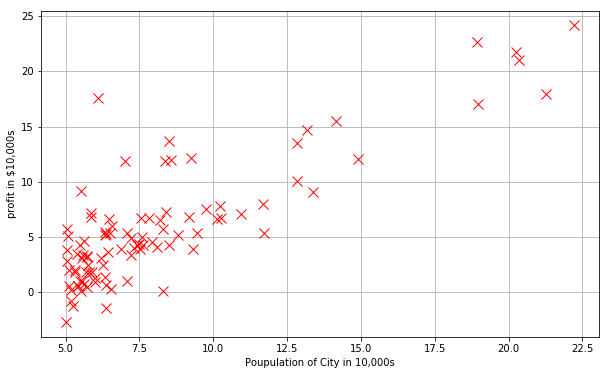

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y[:, 0], 'rx', markersize=10)
plt.grid(True)
plt.ylabel('profit in $10,000s')
plt.xlabel('Poupulation of City in 10,000s')


### 2.2 Gradient Descent

In [4]:
iterations = 1000 # num of iterater
alpha = 0.01 # rate of learning

In [5]:
def h(theta, X):  # Linear Regression hypothesis function 
    return np.dot(X, theta)

def computeCost(theta, X, y):  # Cost function
    return float((1. / (2 * m)) * np.dot((h(theta, X) - y).T, (h(theta, X) - y)))

inital_theta = np.zeros((X.shape[1], 1))
print(computeCost(inital_theta, X, y))


32.072733877455676


In [6]:
def gradientDescent(X, y, theta, alpha, num_iters):
    n = len(theta)
    temp = np.matrix(np.zeros((n, num_iters)))
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        h = np.dot(X, theta)
        temp[:, i] = theta - (alpha / m) * (np.dot(X.T ,(h-y)))
        theta = temp[:, i]
        J_history[i] = computeCost(theta, X, y)
    return theta, temp, J_history

In [7]:
theta, temp,  J_history = gradientDescent(X, y, inital_theta, alpha, iterations)
# X.shape, y.shape, inital_theta.shape

In [8]:
def plotCost(J_history):
    plt.figure(figsize=(10, 6))
    plt.xlim([-100, 1600])
    plt.plot(range(iterations), J_history, 'ro')
    plt.title('Convergence of Cost function')
    plt.xlabel('Iteration number')
    plt.ylabel('Cost J')
    plt.grid(True)
    plt.show()

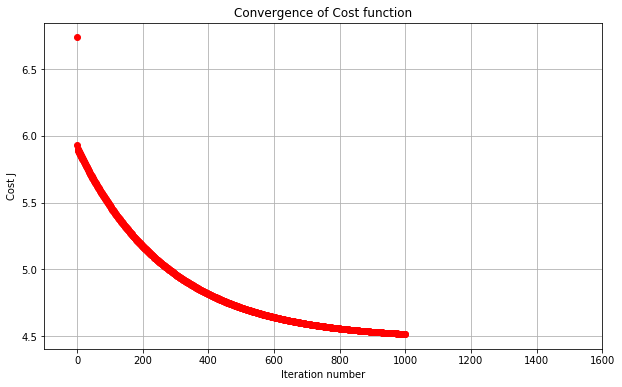

In [9]:
plotCost(J_history)

In [10]:
def fit(X):
    return np.dot(X, theta)

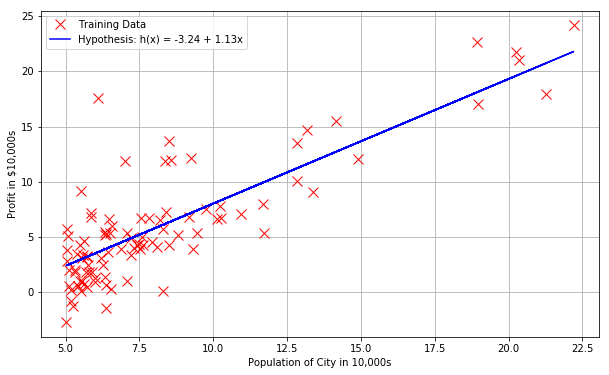

In [11]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y,'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],fit(X),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

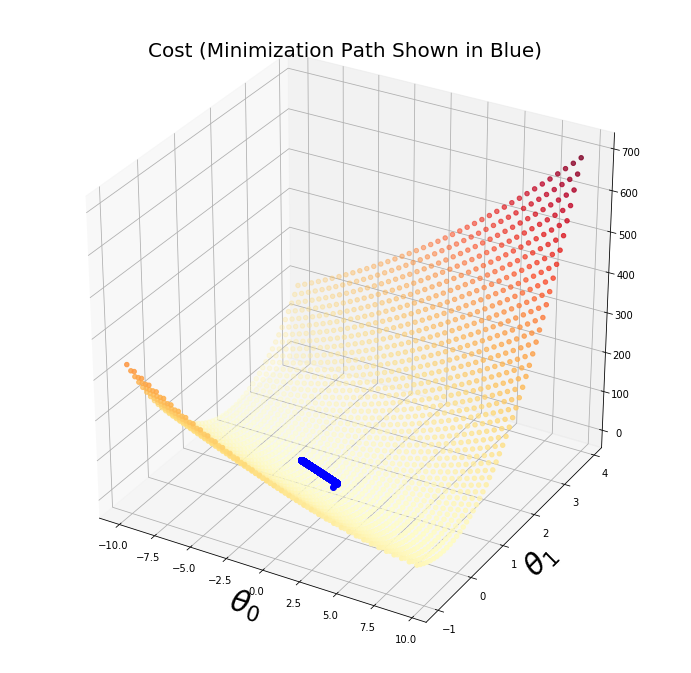

In [12]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=20)
plt.plot(list(np.ravel(temp[0])), list(np.ravel(temp[1])), list(np.ravel(J_history.T)),'bo-')
plt.show()

### 3 Linear regression with multiple variables

In [13]:
cols = np.loadtxt('./ex1data2.txt', delimiter=',', unpack=True)
X = cols[:-1].T
y = cols[-1:].T
X.shape

(47, 2)

In [14]:
def plotFeatures(X, start, end):
    plt.grid(True)
    plt.xlim([start, end])
    dummy = plt.hist(X[:,0],label = r'col1/X1')
    dummy = plt.hist(X[:,1],label = r'col2/X2')
    plt.title('Clearly we need feature normalization.')
    plt.xlabel('Column Value')
    plt.ylabel('Counts')
    dummy = plt.legend()

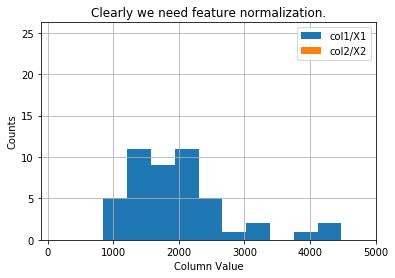

In [15]:
plotFeatures(X, -100, 5000) # obviously need feature normalization

### 3.1 Feature Normalization

In [16]:
def featureNormalize(X):
#     X_normal = np.array(X[:, 1:])
    X_normal = np.array(X)
    mu = np.mean(X_normal, 0)
    sigma = np.std(X_normal, 0)
    X_normal = (X_normal-mu)/sigma
    return X_normal, mu, sigma

X_normal, mu, sigma = featureNormalize(X)
X_normal.shape, mu, sigma

((47, 2),
 array([2000.68085106,    3.17021277]),
 array([7.86202619e+02, 7.52842809e-01]))

(47, 3)

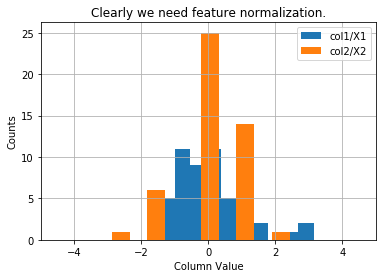

In [17]:
# visualize the feature-normalized data
plotFeatures(X_normal, -5, 5)

X = np.insert(X_normal, 0, 1, axis=1) # add X0=1
X.shape

### 3.2 Gradient Descent

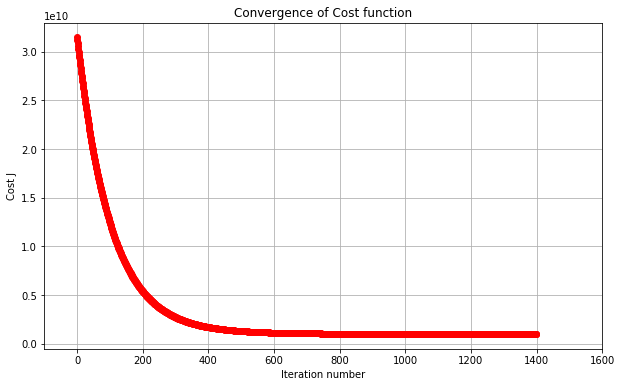

In [18]:
inital_theta = np.zeros((X.shape[1], 1))
iterations = 1400
theta, temp,  J_history = gradientDescent(X, y, inital_theta, alpha, iterations)
plotCost(J_history)

In [19]:
X_test = np.array([[1650.0, 3.0]])
X_normal = (X_test - mu) / sigma
X_test = np.insert(X_normal, 0, 1, axis=1)
y_pred = np.dot(X_test, theta)
y_pred, theta

(matrix([[293346.01603353]]), matrix([[340033.51364647],
         [106523.81632324],
         [ -3656.88142723]]))

### 3.3 Normal Equations

In [21]:
from numpy.linalg import inv
from numpy import dot
theta = dot(dot(inv(dot(X.T, X)), X.T), y)
theta

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

### 4 Linear Regression with Scikit-learn 

In [33]:
X = cols[:-1].T
y = cols[-1:].T
X.shape, y.shape

((47, 2), (47, 1))

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# feature normalization
scaler = StandardScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([[303759.91716092],
       [282521.52228052],
       [359456.64765527],
       [625489.71064724],
       [332482.36396749],
       [398868.77661197],
       [199641.04748709],
       [313086.11181913],
       [218408.91780156],
       [452979.81479222]])